# Similar Car Recommendation (K-Means Clustering)


# Unsupervised Machine Learning Algorithm

# Problem Statement:


Similar Car Recommendation (K-Means Clustering).
Similar cars are recommended as per our preferred car. Used KNN technique, Elbow Curve Method to find the best value of K. Created
Dendrogram. 

# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings("ignore")

# Collecting Data




Reading in the Cars93.csv file into a pandas dataframe.


In [2]:
A = pd.read_csv("E:/Desktop/Cars93.csv")

In [3]:
A.head()

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [4]:
#clustering done on the basis of these 2 columns
B = A[["Price","MPG.city"]]

# Standardization of data using StandardScaler



Standardization is the process of normalizing values to bring all the data into nearly same values.StandardScaler transforms the data in such a way that it has mean as 0 and standard deviation as 1

In [5]:
B = A[["Price","MPG.city"]]
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
C = pd.DataFrame(ss.fit_transform(B),columns=B.columns)

# To see the clusters formed

In [7]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4)
model = km.fit(C)
model.labels_

array([2, 3, 0, 3, 0, 2, 0, 0, 0, 3, 3, 2, 2, 2, 2, 0, 0, 0, 3, 0, 2, 0,
       1, 2, 2, 0, 2, 0, 1, 0, 1, 2, 2, 2, 2, 0, 0, 0, 1, 1, 2, 1, 2, 1,
       2, 2, 2, 3, 0, 3, 3, 3, 1, 1, 2, 0, 3, 3, 3, 2, 2, 1, 0, 1, 2, 0,
       0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 2, 0, 2,
       0, 0, 0, 0, 0])

In [8]:
Q = pd.DataFrame(model.labels_,columns=["Cluster"])
Q.groupby(by="Cluster")['Cluster'].count()

Cluster
0    33
1    16
2    32
3    12
Name: Cluster, dtype: int64

In [9]:
B['Cluster']=model.labels_
B["Make"] = A.Make #type of car
B

,Price,MPG.city,Cluster,Make
0,15.9,25,2,Acura Integra
1,33.9,18,3,Acura Legend
2,29.1,20,0,Audi 90
3,37.7,19,3,Audi 100
4,30.0,22,0,BMW 535i
...,...,...,...,...
88,19.7,17,0,Volkswagen Eurovan
89,20.0,21,0,Volkswagen Passat
90,23.3,18,0,Volkswagen Corrado
91,22.7,21,0,Volvo 240


In [11]:
W = input("Enter a car to find similar cars: ")
cluster_no_of_given_car = B[B.Make == W][["Cluster"]].values[0][0]
print("These are cars similar to the one you like")
for i in B[B.Cluster == cluster_no_of_given_car].Make:
    print(i)


Enter a car to find similar cars: Audi 90
These are cars similar to the one you like
Audi 90
BMW 535i
Buick LeSabre
Buick Roadmaster
Buick Riviera
Chevrolet Lumina_APV
Chevrolet Astro
Chevrolet Caprice
Chrylser Concorde
Chrysler Imperial
Dodge Caravan
Dodge Stealth
Eagle Vision
Ford Aerostar
Ford Taurus
Ford Crown_Victoria
Lexus ES300
Mazda MPV
Mitsubishi Diamante
Nissan Quest
Nissan Maxima
Oldsmobile Silhouette
Oldsmobile Eighty-Eight
Pontiac Firebird
Pontiac Grand_Prix
Pontiac Bonneville
Saab 900
Toyota Previa
Volkswagen Eurovan
Volkswagen Passat
Volkswagen Corrado
Volvo 240
Volvo 850


# Visual Representation of the clusters formed

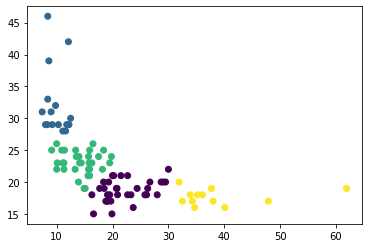

In [12]:
plt.scatter(B.Price,B['MPG.city'],c=B.Cluster)

In [13]:
E = pd.DataFrame(ss.inverse_transform(model.cluster_centers_),columns=["X","Y"])
E

,X,Y
0,22.212121,18.666667
1,9.918750,32.125000
2,14.328125,23.062500
3,38.683333,17.666667


# To see the centroid of each cluster


Text(0, 0.5, 'Mileage in car')

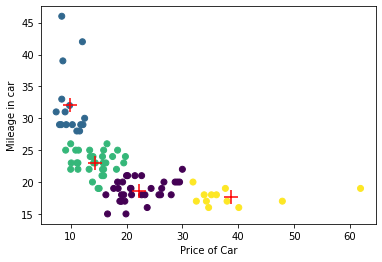

In [14]:
plt.scatter(B.Price,B['MPG.city'],c=B.Cluster)
plt.scatter(E.X,E.Y,c="red",marker="+",s=200)
plt.xlabel("Price of Car")
plt.ylabel("Mileage in car")

# To decide the number of clusters to be created


# Elbow Curve Method



In this method, for each value of K, WCSS is calculated.WCSS is the sum of squared distance between each point and the centroid in a cluster. When we plot the WCSS with the K value,the plot looks like an elbow.


In [16]:
K = range(2,20,1)
WCSS = []
for i in K:
    km = KMeans(n_clusters=i)
    model = km.fit(C)
    WCSS.append(model.inertia_)

In [17]:
WCSS

[93.92806219538846,
 55.24519288386834,
 38.13325876059033,
 25.743307121066692,
 17.33210317456429,
 13.640079541196194,
 11.724190968590216,
 10.180193157668048,
 8.729867299293865,
 7.824518470248384,
 7.054575903398993,
 6.084918347464776,
 5.670843994775794,
 4.898794133209955,
 4.410013143197942,
 3.9724196365319417,
 3.635566602641824,
 3.3419587717936983]

Text(0.5, 1.0, 'Elbow curve Cars Data')

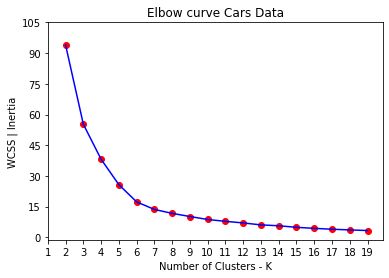

In [18]:
plt.scatter(K,WCSS,c="red")
plt.plot(K,WCSS,c="blue")
plt.xlabel("Number of Clusters - K")
plt.ylabel("WCSS | Inertia")
plt.xticks(range(1,20,1))
plt.yticks(range(0,110,15))
plt.title("Elbow curve Cars Data")

# K = 6 is the best value of K because from from 1 to 6,the distance is drastically reducing. But after 6, the distance is gradually reducing.

# Hierarchical Clustering



Algorithm that groups similar objects into groups called clusters. It creates Dendrogram


# Agglomerative Clustering




It starts with individual data atoms. It follows the bottom to top approach. It is called as Dendrogram.


In [19]:
from sklearn.cluster import AgglomerativeClustering
agc = AgglomerativeClustering(n_clusters=5,linkage="single")
model = agc.fit(C)
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 0, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1], dtype=int64)

In [20]:
Q = pd.DataFrame(model.labels_,columns=["Cluster"])
Q.groupby(by="Cluster")['Cluster'].count()

Cluster
0     2
1    88
2     1
3     1
4     1
Name: Cluster, dtype: int64

Text(0, 0.5, 'Mileage')

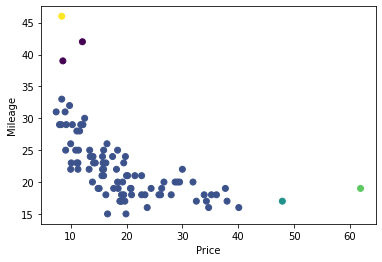

In [21]:
plt.scatter(B.Price,B['MPG.city'],c=model.labels_)
plt.xlabel("Price")
plt.ylabel("Mileage")

In [22]:
#point to point distance
from scipy.spatial import distance_matrix
distance_matrix(C,C)

array([[0.        , 2.25357714, 1.63948708, ..., 1.47025216, 1.00652265,
        1.43661919],
       [2.25357714, 0.        , 0.61453009, ..., 1.10332116, 1.28339191,
        0.83046302],
       [1.63948708, 0.61453009, 0.        , ..., 0.70177526, 0.68976194,
        0.24980856],
       ...,
       [1.47025216, 1.10332116, 0.70177526, ..., 0.        , 0.54034034,
        0.50326133],
       [1.00652265, 1.28339191, 0.68976194, ..., 0.54034034, 0.        ,
        0.45315871],
       [1.43661919, 0.83046302, 0.24980856, ..., 0.50326133, 0.45315871,
        0.        ]])

In [23]:
from scipy.cluster.hierarchy import dendrogram, linkage

point to cluster distance/cluster to cluster distance - Linkage

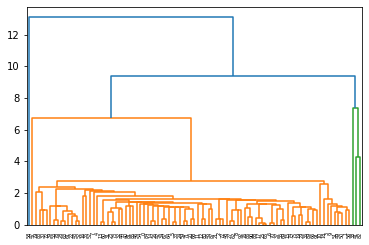

In [24]:
dendrogram(linkage(distance_matrix(C,C)))
plt.show()